# Julia Sets and Newton-Raphson 

The Julia set iteration is defined as:
$$
z_{n+1} = z_n^2 + C
$$



A fixed point $z^*$ satisfies:
$$
z^* = (z^*)^2 + C
$$

$$
(z^*)^2 - z^* + C = 0
$$

   \textbf{ Newton-Raphson Formulation:}

Define the function whose roots we want to find:
$$
f(z) = z^2 - z + C
$$

The derivative is:
$$
f'(z) = 2z - 1
$$

The Newton-Raphson iteration formula becomes:

\begin{align}

z_{n+1} &= z_n - \frac{f(z_n)}{f'(z_n)} \\
&= z_n - \frac{z_n^2 - z_n + C}{2z_n - 1}\\
&= \frac{z_n(2z_n - 1) - (z_n^2 - z_n + C)}{2z_n - 1} \\
&= \frac{2z_n^2 - z_n - z_n^2 + z_n - C}{2z_n - 1} \\
&= \frac{z_n^2 - C}{2z_n - 1}

\end{align}

Both methods are connected through the equation:
$$
z^2 - z + C = 0
$$

The Julia set iteration $z_{n+1} = z_n^2 + C$ and the Newton-Raphson iteration $z_{n+1} = \frac{z_n^2 - C}{2z_n - 1}$ both relate to finding solutions of this equation, though they represent different dynamical systems with different convergence properties.

 Parameters

In [34]:
import numpy as np
import matplotlib.pyplot as plt

C = -0.75 + 0.1j
xlim, ylim = (-2, 2), (-2, 2)
width, height = 800, 800
max_iter = 200
escape_radius = 2.0
eps = 1e-8

Helper functions

In [28]:

def create_grid(xlim, ylim, width, height):
    x = np.linspace(xlim[0], xlim[1], width)
    y = np.linspace(ylim[0], ylim[1], height)
    X, Y = np.meshgrid(x, y)
    return X + 1j*Y

def get_roots(C):
    return np.roots([1, -1, C])

Direct iteration (escape-time Julia)

In [29]:

def julia(C, grid, max_iter, R):
    Z = grid.copy()
    escape_times = np.zeros(Z.shape, dtype=int)
    for n in range(1, max_iter+1):
        Z = Z**2 + C
        mask = (np.abs(Z) > R) & (escape_times == 0)
        escape_times[mask] = n
    escape_times[escape_times == 0] = max_iter
    return escape_times

Computaion part

In [30]:
grid = create_grid(xlim, ylim, width, height)
escape_times = julia(C, grid, max_iter, escape_radius)

C:\Users\Georg\AppData\Local\Temp\ipykernel_7744\37557997.py:5: RuntimeWarning: overflow encountered in square
  Z = Z**2 + C
C:\Users\Georg\AppData\Local\Temp\ipykernel_7744\37557997.py:5: RuntimeWarning: invalid value encountered in square
  Z = Z**2 + C


PLot julia set

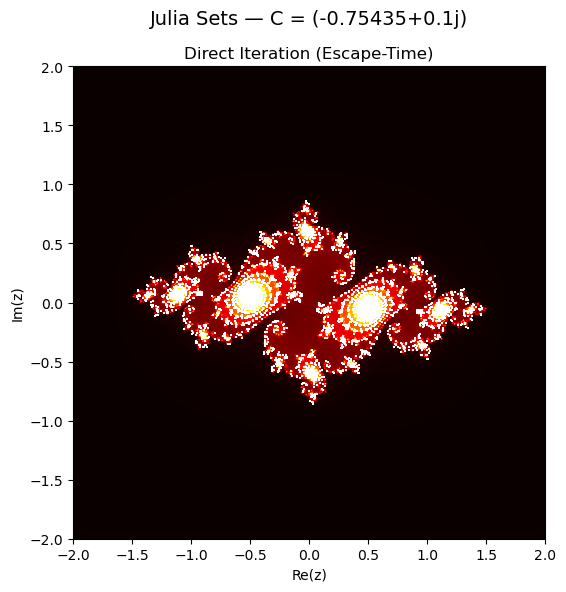

In [33]:
fig, (ax1) = plt.subplots(figsize=(14, 6))

# escape-time Julia
mask = (escape_times == max_iter)
plot_data = escape_times.astype(float)
plot_data[mask] = np.nan
ax1.imshow(plot_data, extent=[*xlim, *ylim], origin="lower", cmap="hot")
ax1.set_title("Direct Iteration (Escape-Time)")
ax1.set_xlabel("Re(z)")
ax1.set_ylabel("Im(z)")


plt.suptitle(f"Julia Sets — C = {C}", fontsize=14)
plt.tight_layout()
plt.show()